In [1]:
"""
Ce fichier analyse comment l'evolutin de la distance meandre d'une valeur assez 
grandre a une valuer tres petite influence la frequence de raisonnance

Dans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree
"""

"\nCe fichier analyse comment l'evolutin de la distance meandre d'une valeur assez \ngrandre a une valuer tres petite influence la frequence de raisonnance\n\nDans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree\n"

In [2]:
from utils.ifa_meander_project_v2.geometry import *
from utils.ifa_meander_project_v2.meshing import *
from utils.ifa_meander_project_v2.frequency import *
from utils.ifa_meander_project_v2.simulation import *

fC      = 868e6  # fréquence centrale en Hz
delta_f = 4e6  # écart entre les échantillons en Hz
print(f"delta_f = {delta_f/1e6:.2f} MHz")
nPoints = 31     # nombre d'échantillons

fLow, fHigh, frequencies = calc_frequencies(fC, delta_f, nPoints)
print(f"fLow = {fLow/1e6:.2f} MHz, fHigh = {fHigh/1e6:.2f} MHz, nPoints = {nPoints}")

In [3]:
fC      = 868e6
fLow    = 700e6
fHigh   = 900e6

nPoints = calculate_nPoints(fLow, fHigh, fC, 15)
accuracy= 0.01
print(f"nPoints = {nPoints}")
frequencies = np.linspace(fLow, fHigh, nPoints)
fc_index = np.where(frequencies == fC)[0][0]
print(f"fc_index = {fc_index}")

nPoints = 26
fc_index = 21


In [4]:
mesh_name = "ifa_meander_anlyse_2.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_anlyse_2.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [ ]:
a = 25 / 1000  # Largeur
b = 40 / 1000  # Hauteur

terminal_a = 60 / 1000
terminal_b = b
x_t = np.array([-terminal_a, 0, 0, -terminal_a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# On fixe le short feed et la largur de piste
""" largeur_piste    = 1 / 1000        # Valeur Minimale    --- > pour les donnee de ARIA
distance_meandre = 1.5 / 1000        # Valeur choisie en fonction du resulat de analyse_dist_meandre.ipynb """
largeur_piste    = 2.5 / 1000        # Valeur Minimale
distance_meandre = 2.5 / 1000        # Valeur choisie en fonction du resulat de analyse_dist_meandre.ipynb
feed             = 15 / 1000         # Valuer Positionné a la moitié du ground plane -- 25 mm
feed_point       = [0, feed, 0]      # On alimente au short feed

In [6]:
def creation_ifa(largeur, hauteur, width, dist_meandre, x_t, y_t, save_mesh_folder, mesh_name, mesh_size=5.25/1000):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width                    # La largeur de la piste est la meme partout
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

In [7]:
def plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC=None):
    from matplotlib import pyplot as plt
    frequencies = np.linspace(fLow, fHigh, nPoints)
    frequencies_mhz = np.array(frequencies) / 1e6
    s11_db = np.array(s11_db)

    # Trouver le minimum de S11
    min_index = np.argmin(s11_db)
    f_resonance = frequencies[min_index] / 1e6
    s11_min = s11_db[min_index]

    # Tracé
    fig_size = 7
    Fibonacci = (1 + np.sqrt(5)) / 2
    plt.figure(figsize=(fig_size, fig_size / Fibonacci))
    plt.plot(frequencies_mhz, s11_db, label="S11 (dB)", color='blue')
    plt.plot(f_resonance, s11_min, 'ro', 
            label=f"Résonance: {f_resonance:.2f} MHz (S11={s11_min:.2f} dB)")
    
    if fC:
        fC_mhz = fC / 1e6
        idx_fc = np.argmin(np.abs(frequencies - fC))
        s11_fc = s11_db[idx_fc]
        plt.axvline(fC_mhz, color='green', linestyle='--', 
                   label=f"fC = {fC_mhz:.2f} MHz (S11={s11_fc:.2f} dB)")

    plt.xlabel("Fréquence (MHz)")
    plt.ylabel("S11 (dB)")
    plt.title("Courbe de S11 vs Fréquence")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Iteration N°1
distance meandres = 2.5 mm
Largeur de piste ifa = 2.5 mm
position feed = 15.0 mm

Number of meanders = 5
New distance meandres = 2.5 mm

Simulation 1/26 | f = 700.00 MHz | S11 = -1.35 dB
Simulation 2/26 | f = 708.00 MHz | S11 = -1.73 dB
Simulation 3/26 | f = 716.00 MHz | S11 = -2.26 dB
Simulation 4/26 | f = 724.00 MHz | S11 = -3.01 dB
Simulation 5/26 | f = 732.00 MHz | S11 = -4.13 dB
Simulation 6/26 | f = 740.00 MHz | S11 = -5.80 dB
Simulation 7/26 | f = 748.00 MHz | S11 = -8.38 dB
Simulation 8/26 | f = 756.00 MHz | S11 = -12.29 dB
Simulation 9/26 | f = 764.00 MHz | S11 = -15.36 dB
Simulation 10/26 | f = 772.00 MHz | S11 = -12.07 dB
Simulation 11/26 | f = 780.00 MHz | S11 = -8.45 dB
Simulation 12/26 | f = 788.00 MHz | S11 = -6.08 dB
Simulation 13/26 | f = 796.00 MHz | S11 = -4.52 dB
Simulation 14/26 | f = 804.00 MHz | S11 = -3.47 dB
Simulation 15/26 | f = 812.00 MHz | S11 = -2.74 dB
Simulation 16/26 | f = 820.00 MHz | S11 = -2.21 dB
Simulation 17/26 | f = 828.00 MHz | S1

Simulation 22/26 | f = 868.00 MHz | S11 = -0.84 dB
Simulation 23/26 | f = 876.00 MHz | S11 = -0.75 dB
Simulation 24/26 | f = 884.00 MHz | S11 = -0.66 dB
Simulation 25/26 | f = 892.00 MHz | S11 = -0.60 dB
Simulation 26/26 | f = 900.00 MHz | S11 = -0.54 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 764.00 MHz
→ Impédance à f_res      = 37.79-8.81j Ω


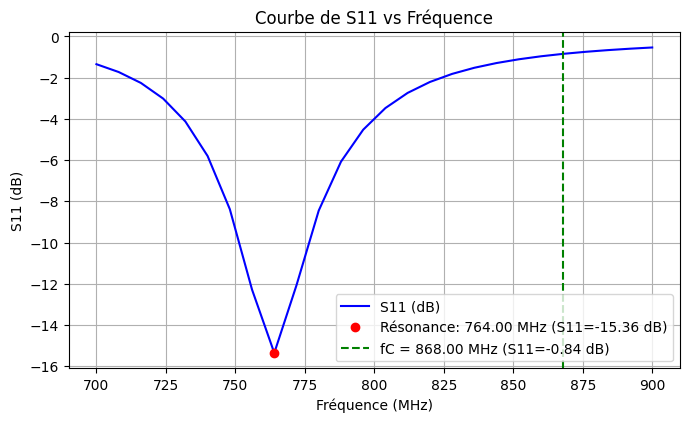


Ratio = 0.880184331797235


We are FAR of fc!


Iteration N°2
distance meandres = 3.2269537567500897 mm
Largeur de piste ifa = 3.2269537567500897 mm
position feed = 15.0 mm

Number of meanders = 3
New distance meandres = 5.106379576583244 mm

Simulation 1/26 | f = 700.00 MHz | S11 = -0.22 dB
Simulation 2/26 | f = 708.00 MHz | S11 = -0.25 dB
Simulation 3/26 | f = 716.00 MHz | S11 = -0.27 dB
Simulation 4/26 | f = 724.00 MHz | S11 = -0.30 dB
Simulation 5/26 | f = 732.00 MHz | S11 = -0.33 dB
Simulation 6/26 | f = 740.00 MHz | S11 = -0.37 dB
Simulation 7/26 | f = 748.00 MHz | S11 = -0.41 dB
Simulation 8/26 | f = 756.00 MHz | S11 = -0.45 dB
Simulation 9/26 | f = 764.00 MHz | S11 = -0.50 dB
Simulation 10/26 | f = 772.00 MHz | S11 = -0.56 dB
Simulation 11/26 | f = 780.00 MHz | S11 = -0.63 dB
Simulation 12/26 | f = 788.00 MHz | S11 = -0.71 dB
Simulation 13/26 | f = 796.00 MHz | S11 = -0.79 dB
Simulation 14/26 | f = 804.00 MHz | S11 = -0.90 dB
Simulation 15/26 | f = 812.00 MHz | S11 = -1.02 dB


Simulation 22/26 | f = 868.00 MHz | S11 = -2.72 dB
Simulation 23/26 | f = 876.00 MHz | S11 = -3.19 dB
Simulation 24/26 | f = 884.00 MHz | S11 = -3.77 dB
Simulation 25/26 | f = 892.00 MHz | S11 = -4.49 dB
Simulation 26/26 | f = 900.00 MHz | S11 = -5.38 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 900.00 MHz
→ Impédance à f_res      = 109.63-73.44j Ω


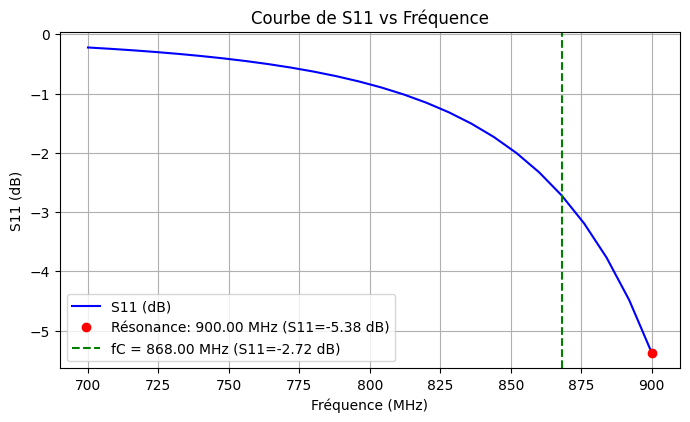


Ratio = 1.0368663594470047


We are FAR of fc!


Iteration N°3
distance meandres = 3.001560996574913 mm
Largeur de piste ifa = 3.001560996574913 mm
position feed = 15.0 mm

Number of meanders = 4
New distance meandres = 3.2484390034250876 mm

Simulation 1/26 | f = 700.00 MHz | S11 = -0.43 dB
Simulation 2/26 | f = 708.00 MHz | S11 = -0.49 dB
Simulation 3/26 | f = 716.00 MHz | S11 = -0.56 dB
Simulation 4/26 | f = 724.00 MHz | S11 = -0.65 dB
Simulation 5/26 | f = 732.00 MHz | S11 = -0.76 dB
Simulation 6/26 | f = 740.00 MHz | S11 = -0.89 dB
Simulation 7/26 | f = 748.00 MHz | S11 = -1.05 dB
Simulation 8/26 | f = 756.00 MHz | S11 = -1.25 dB
Simulation 9/26 | f = 764.00 MHz | S11 = -1.50 dB
Simulation 10/26 | f = 772.00 MHz | S11 = -1.81 dB
Simulation 11/26 | f = 780.00 MHz | S11 = -2.21 dB
Simulation 12/26 | f = 788.00 MHz | S11 = -2.73 dB
Simulation 13/26 | f = 796.00 MHz | S11 = -3.42 dB
Simulation 14/26 | f = 804.00 MHz | S11 = -4.34 dB
Simulation 15/26 | f = 812.00 MHz | S11 = -5.60 dB


Simulation 22/26 | f = 868.00 MHz | S11 = -9.90 dB
Simulation 23/26 | f = 876.00 MHz | S11 = -7.61 dB
Simulation 24/26 | f = 884.00 MHz | S11 = -6.02 dB
Simulation 25/26 | f = 892.00 MHz | S11 = -4.87 dB
Simulation 26/26 | f = 900.00 MHz | S11 = -4.01 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 844.00 MHz
→ Impédance à f_res      = 46.61-8.95j Ω


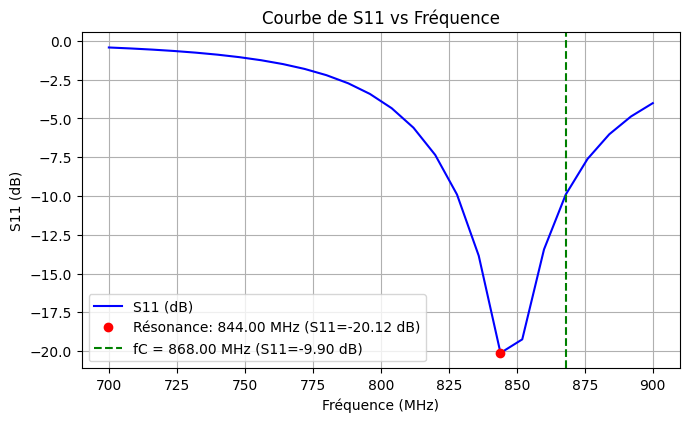


Ratio = 0.9723502304147466


We are FAR of fc!


Iteration N°4
distance meandres = 3.1746929711308387 mm
Largeur de piste ifa = 3.1746929711308387 mm
position feed = 15.0 mm

Number of meanders = 3
New distance meandres = 5.158640362202495 mm

Simulation 1/26 | f = 700.00 MHz | S11 = -0.22 dB
Simulation 2/26 | f = 708.00 MHz | S11 = -0.25 dB
Simulation 3/26 | f = 716.00 MHz | S11 = -0.27 dB
Simulation 4/26 | f = 724.00 MHz | S11 = -0.30 dB
Simulation 5/26 | f = 732.00 MHz | S11 = -0.33 dB
Simulation 6/26 | f = 740.00 MHz | S11 = -0.37 dB
Simulation 7/26 | f = 748.00 MHz | S11 = -0.41 dB
Simulation 8/26 | f = 756.00 MHz | S11 = -0.46 dB
Simulation 9/26 | f = 764.00 MHz | S11 = -0.51 dB
Simulation 10/26 | f = 772.00 MHz | S11 = -0.57 dB
Simulation 11/26 | f = 780.00 MHz | S11 = -0.64 dB
Simulation 12/26 | f = 788.00 MHz | S11 = -0.71 dB
Simulation 13/26 | f = 796.00 MHz | S11 = -0.80 dB
Simulation 14/26 | f = 804.00 MHz | S11 = -0.91 dB
Simulation 15/26 | f = 812.00 MHz | S11 = -1.03 dB

Simulation 22/26 | f = 868.00 MHz | S11 = -2.78 dB
Simulation 23/26 | f = 876.00 MHz | S11 = -3.27 dB
Simulation 24/26 | f = 884.00 MHz | S11 = -3.88 dB
Simulation 25/26 | f = 892.00 MHz | S11 = -4.62 dB
Simulation 26/26 | f = 900.00 MHz | S11 = -5.55 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 900.00 MHz
→ Impédance à f_res      = 104.67-71.32j Ω


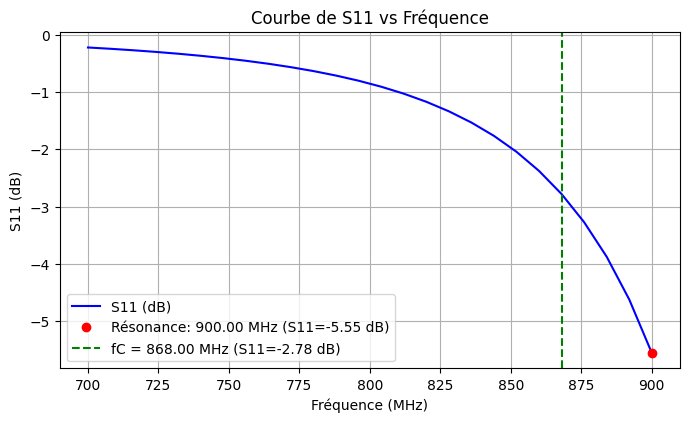


Ratio = 1.0368663594470047


We are FAR of fc!


Iteration N°5
distance meandres = 2.952950465532446 mm
Largeur de piste ifa = 2.952950465532446 mm
position feed = 15.0 mm

Number of meanders = 4
New distance meandres = 3.2970495344675546 mm

Simulation 1/26 | f = 700.00 MHz | S11 = -0.44 dB
Simulation 2/26 | f = 708.00 MHz | S11 = -0.50 dB
Simulation 3/26 | f = 716.00 MHz | S11 = -0.58 dB
Simulation 4/26 | f = 724.00 MHz | S11 = -0.67 dB
Simulation 5/26 | f = 732.00 MHz | S11 = -0.78 dB
Simulation 6/26 | f = 740.00 MHz | S11 = -0.92 dB
Simulation 7/26 | f = 748.00 MHz | S11 = -1.09 dB
Simulation 8/26 | f = 756.00 MHz | S11 = -1.29 dB
Simulation 9/26 | f = 764.00 MHz | S11 = -1.56 dB
Simulation 10/26 | f = 772.00 MHz | S11 = -1.89 dB
Simulation 11/26 | f = 780.00 MHz | S11 = -2.32 dB
Simulation 12/26 | f = 788.00 MHz | S11 = -2.88 dB
Simulation 13/26 | f = 796.00 MHz | S11 = -3.62 dB
Simulation 14/26 | f = 804.00 MHz | S11 = -4.62 dB
Simulation 15/26 | f = 812.00 MHz | S11 = -5.99 dB


Simulation 22/26 | f = 868.00 MHz | S11 = -9.04 dB
Simulation 23/26 | f = 876.00 MHz | S11 = -7.01 dB
Simulation 24/26 | f = 884.00 MHz | S11 = -5.58 dB
Simulation 25/26 | f = 892.00 MHz | S11 = -4.54 dB
Simulation 26/26 | f = 900.00 MHz | S11 = -3.75 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 844.00 MHz
→ Impédance à f_res      = 44.21-5.84j Ω


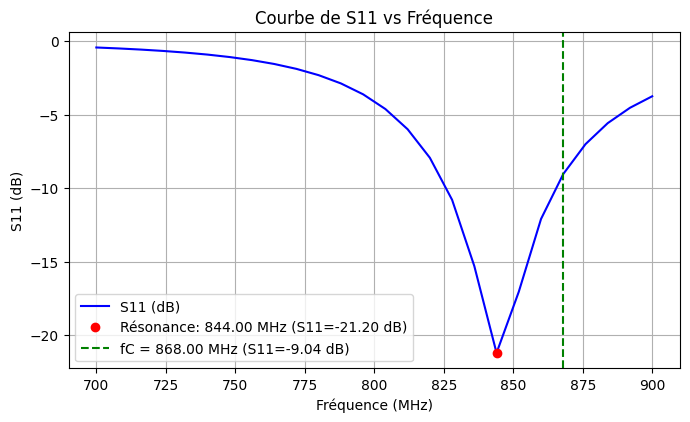


Ratio = 0.9723502304147466


We are FAR of fc!


Iteration N°6
distance meandres = 3.1232785532997314 mm
Largeur de piste ifa = 3.1232785532997314 mm
position feed = 15.0 mm

Number of meanders = 4
New distance meandres = 3.126721446700269 mm

Simulation 1/26 | f = 700.00 MHz | S11 = -0.40 dB
Simulation 2/26 | f = 708.00 MHz | S11 = -0.46 dB
Simulation 3/26 | f = 716.00 MHz | S11 = -0.53 dB
Simulation 4/26 | f = 724.00 MHz | S11 = -0.61 dB
Simulation 5/26 | f = 732.00 MHz | S11 = -0.71 dB
Simulation 6/26 | f = 740.00 MHz | S11 = -0.83 dB
Simulation 7/26 | f = 748.00 MHz | S11 = -0.97 dB
Simulation 8/26 | f = 756.00 MHz | S11 = -1.14 dB
Simulation 9/26 | f = 764.00 MHz | S11 = -1.36 dB
Simulation 10/26 | f = 772.00 MHz | S11 = -1.64 dB
Simulation 11/26 | f = 780.00 MHz | S11 = -1.98 dB
Simulation 12/26 | f = 788.00 MHz | S11 = -2.43 dB
Simulation 13/26 | f = 796.00 MHz | S11 = -3.00 dB
Simulation 14/26 | f = 804.00 MHz | S11 = -3.76 dB
Simulation 15/26 | f = 812.00 MHz | S11 = -4.79 dB

Simulation 22/26 | f = 868.00 MHz | S11 = -12.57 dB
Simulation 23/26 | f = 876.00 MHz | S11 = -9.39 dB
Simulation 24/26 | f = 884.00 MHz | S11 = -7.29 dB
Simulation 25/26 | f = 892.00 MHz | S11 = -5.82 dB
Simulation 26/26 | f = 900.00 MHz | S11 = -4.75 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 852.00 MHz
→ Impédance à f_res      = 45.57-5.37j Ω


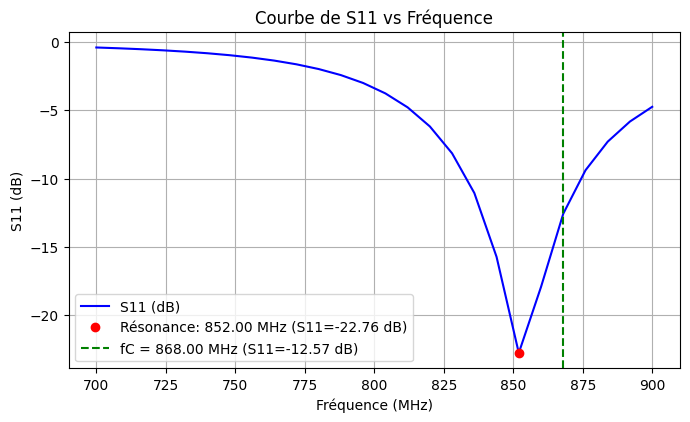


Ratio = 0.9815668202764977


We are within 2% of fc!


Iteration N°7
distance meandres = 3.1232785532997314 mm
Largeur de piste ifa = 3.1232785532997314 mm
position feed = 14.452101340015714 mm

Number of meanders = 4
New distance meandres = 3.126721446700269 mm

Simulation 1/26 | f = 700.00 MHz | S11 = -0.40 dB
Simulation 2/26 | f = 708.00 MHz | S11 = -0.45 dB
Simulation 3/26 | f = 716.00 MHz | S11 = -0.52 dB
Simulation 4/26 | f = 724.00 MHz | S11 = -0.60 dB
Simulation 5/26 | f = 732.00 MHz | S11 = -0.69 dB
Simulation 6/26 | f = 740.00 MHz | S11 = -0.81 dB
Simulation 7/26 | f = 748.00 MHz | S11 = -0.95 dB
Simulation 8/26 | f = 756.00 MHz | S11 = -1.12 dB
Simulation 9/26 | f = 764.00 MHz | S11 = -1.33 dB
Simulation 10/26 | f = 772.00 MHz | S11 = -1.60 dB
Simulation 11/26 | f = 780.00 MHz | S11 = -1.93 dB
Simulation 12/26 | f = 788.00 MHz | S11 = -2.36 dB
Simulation 13/26 | f = 796.00 MHz | S11 = -2.93 dB
Simulation 14/26 | f = 804.00 MHz | S11 = -3.67 dB
Simulation 15/26 | f = 812.00 

Simulation 22/26 | f = 868.00 MHz | S11 = -12.93 dB
Simulation 23/26 | f = 876.00 MHz | S11 = -9.58 dB
Simulation 24/26 | f = 884.00 MHz | S11 = -7.40 dB
Simulation 25/26 | f = 892.00 MHz | S11 = -5.89 dB
Simulation 26/26 | f = 900.00 MHz | S11 = -4.78 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 852.00 MHz
→ Impédance à f_res      = 46.69-5.85j Ω


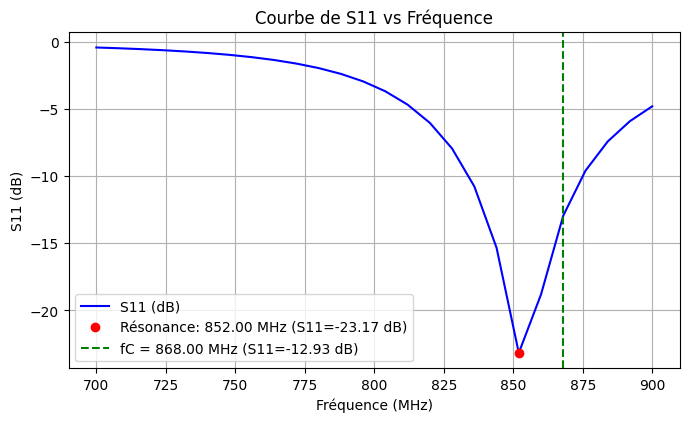


Ratio = 0.9815668202764977


We are within 2% of fc!


Iteration N°8
distance meandres = 3.1232785532997314 mm
Largeur de piste ifa = 3.1232785532997314 mm
position feed = 13.9242155428056 mm

Number of meanders = 4
New distance meandres = 3.126721446700269 mm

Simulation 1/26 | f = 700.00 MHz | S11 = -0.40 dB
Simulation 2/26 | f = 708.00 MHz | S11 = -0.45 dB
Simulation 3/26 | f = 716.00 MHz | S11 = -0.52 dB
Simulation 4/26 | f = 724.00 MHz | S11 = -0.60 dB
Simulation 5/26 | f = 732.00 MHz | S11 = -0.69 dB
Simulation 6/26 | f = 740.00 MHz | S11 = -0.80 dB
Simulation 7/26 | f = 748.00 MHz | S11 = -0.94 dB
Simulation 8/26 | f = 756.00 MHz | S11 = -1.11 dB
Simulation 9/26 | f = 764.00 MHz | S11 = -1.32 dB
Simulation 10/26 | f = 772.00 MHz | S11 = -1.57 dB
Simulation 11/26 | f = 780.00 MHz | S11 = -1.90 dB
Simulation 12/26 | f = 788.00 MHz | S11 = -2.32 dB
Simulation 13/26 | f = 796.00 MHz | S11 = -2.86 dB
Simulation 14/26 | f = 804.00 MHz | S11 = -3.56 dB
Simulation 15/26 | f = 812.00 MH

Simulation 22/26 | f = 868.00 MHz | S11 = -13.81 dB
Simulation 23/26 | f = 876.00 MHz | S11 = -10.16 dB
Simulation 24/26 | f = 884.00 MHz | S11 = -7.82 dB
Simulation 25/26 | f = 892.00 MHz | S11 = -6.20 dB
Simulation 26/26 | f = 900.00 MHz | S11 = -5.03 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 852.00 MHz
→ Impédance à f_res      = 47.47-8.12j Ω


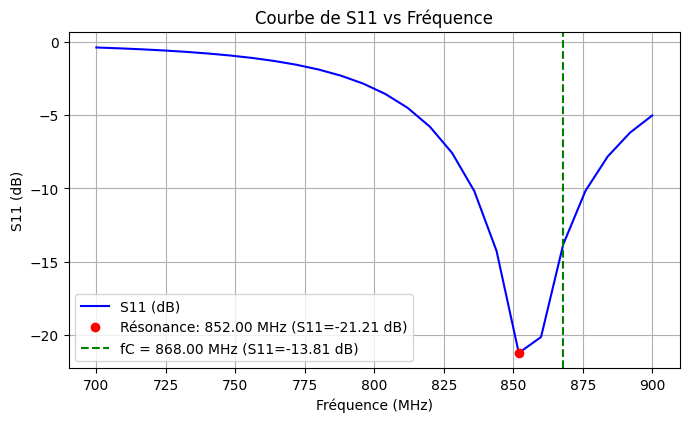


Ratio = 0.9815668202764977


We are within 2% of fc!


Iteration N°9
distance meandres = 3.1232785532997314 mm
Largeur de piste ifa = 3.1232785532997314 mm
position feed = 13.415611606989897 mm

Number of meanders = 4
New distance meandres = 3.126721446700269 mm

Simulation 1/26 | f = 700.00 MHz | S11 = -0.39 dB
Simulation 2/26 | f = 708.00 MHz | S11 = -0.45 dB
Simulation 3/26 | f = 716.00 MHz | S11 = -0.51 dB
Simulation 4/26 | f = 724.00 MHz | S11 = -0.59 dB
Simulation 5/26 | f = 732.00 MHz | S11 = -0.68 dB
Simulation 6/26 | f = 740.00 MHz | S11 = -0.79 dB
Simulation 7/26 | f = 748.00 MHz | S11 = -0.92 dB
Simulation 8/26 | f = 756.00 MHz | S11 = -1.08 dB
Simulation 9/26 | f = 764.00 MHz | S11 = -1.28 dB
Simulation 10/26 | f = 772.00 MHz | S11 = -1.53 dB
Simulation 11/26 | f = 780.00 MHz | S11 = -1.84 dB
Simulation 12/26 | f = 788.00 MHz | S11 = -2.24 dB
Simulation 13/26 | f = 796.00 MHz | S11 = -2.75 dB
Simulation 14/26 | f = 804.00 MHz | S11 = -3.42 dB
Simulation 15/26 | f = 812.00 

Simulation 22/26 | f = 868.00 MHz | S11 = -14.97 dB
Simulation 23/26 | f = 876.00 MHz | S11 = -10.86 dB
Simulation 24/26 | f = 884.00 MHz | S11 = -8.29 dB
Simulation 25/26 | f = 892.00 MHz | S11 = -6.54 dB
Simulation 26/26 | f = 900.00 MHz | S11 = -5.28 dB

📡 Résultats de simulation :
→ Fréquence de résonance = 860.00 MHz
→ Impédance à f_res      = 42.74+0.35j Ω


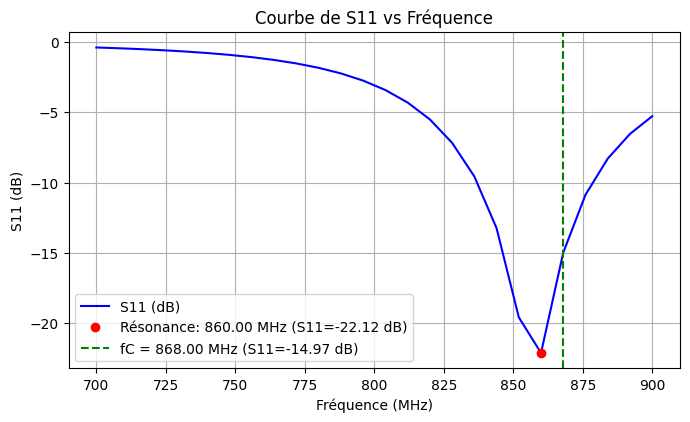


Ratio = 0.9907834101382489


Required Accuracy is met!


In [8]:
iteration = 1
max_iter = 12
N_list = []
frequences_resonance = []
Accuracy = 0.01
while iteration <= max_iter:
    try:
        print(f"\nIteration N°{iteration}")
        print(f"distance meandres = {distance_meandre * 1000} mm")
        print(f"Largeur de piste ifa = {largeur_piste * 1000} mm")
        print(f"position feed = {feed * 1000} mm\n")
        N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, x_t, y_t, save_mesh_folder, mesh_name)
        print(f"Number of meanders = {N_list_elem}")
        print(f"New distance meandres = {new_distance_meandre_elem * 1000} mm\n")
        N_list.append(N_list_elem)
        frequence_resonance, s11_db, R_res, X_res = simulate(frequencies, ifa_meander_mat, fC, feed_point)
        frequences_resonance.append(frequence_resonance)
        # plot(s11_db)
        plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)

        ratio = frequence_resonance / fC
        print(f"\nRatio = {ratio}\n")
        # distance_meandre = distance_meandre / ratio

        if (abs((fC - frequence_resonance)/fC) < Accuracy):
            min_index = np.argmin(s11_db)
            min_s11 = s11_db[min_index]
            s11_fc = s11_db[fc_index]
            """ print("\nRequired Accuracy is met!")
            break """
            if s11_fc < -10 or min_s11 < -20:
                print("\nRequired Accuracy is met!")
                break
            else:
                print("\nOn cherche le matching !!!")
                # feed          = feed * (R_res / 50)

                print(f"\nresultat X_res / 50 = {X_res / 50}")
                print(f"\nresultat R_res / 50 = {R_res / 50}")

                feed_adjustment_factor = max(abs(X_res), abs(R_res)) / 50

                if ratio == 1:
                    print("Meilleur resulat possible obtennue")
                    break

                feed = max(min(feed * ratio**2, b - 3 * largeur_piste / 2 - 0.5 / 1000), largeur_piste / 2)

                print(f"\nresultat feed = {feed*1000} mm")

                if feed == b - largeur_piste - 0.5 / 1000 or feed == largeur_piste / 2:
                    distance_meandre = distance_meandre / (ratio**2)
                    largeur_piste = largeur_piste / ratio**2

                feed_point       = [0, feed, 0]

        elif abs(frequence_resonance - fC) < 0.02 * fC:
            """ print(f"frequence_resonance {frequence_resonance} is not within 2% of fC {fC}")
            raise ValueError(f"frequence_resonance {frequence_resonance} is not within 2% of fC {fC}") """
            print(f"\nWe are within 2% of fc!\n")
            # largeur_piste = largeur_piste * ratio**1
            feed = max(min(feed * ratio**2, b - 3 * largeur_piste / 2 - 0.5 / 1000), largeur_piste / 2)

            if feed == b - largeur_piste - 0.5 / 1000 or feed == largeur_piste / 2:
                print("\nBord extreme atteint\n")
                distance_meandre = distance_meandre / (ratio**2)
                largeur_piste = largeur_piste / ratio**2
            
            feed_point       = [0, feed, 0]
        else:
            print(f"\nWe are FAR of fc!\n")
            distance_meandre = distance_meandre / (ratio**2)
            largeur_piste = largeur_piste / ratio**2

        """ largeur_piste = largeur_piste * ratio**2
        if largeur_piste < 0.5 / 1000:
            largeur_piste = 0.5 / 1000 """
        
        if (iteration == max_iter):
            print("Convergence non atteinte, nombre max d'itteration atteint ----> Meilleurs resultats")
        iteration += 1
    except ValueError as e:
        print(f"Error: {e}")

In [9]:
lower_bound = fC * (1 - 0.02)
upper_bound = fC * (1 + 0.02)
print('In the 2%')
print(f"Les fréquences qui bordent les 2% sont : {lower_bound*1e-6} Hz et {upper_bound*1e-6} Hz")

lower_bound = fC * (1 - 0.03)
upper_bound = fC * (1 + 0.03)
print('In the 3%')
print(f"Les fréquences qui bordent les 2% sont : {lower_bound*1e-6} Hz et {upper_bound*1e-6} Hz")

In the 2%
Les fréquences qui bordent les 2% sont : 850.64 Hz et 885.36 Hz
In the 3%
Les fréquences qui bordent les 2% sont : 841.9599999999999 Hz et 894.04 Hz


In [10]:
def plot(s11_db):
    from matplotlib import pyplot as plt
    # Conversion des fréquences de résonance en MHz
    frequencies_mhz = np.array(frequencies) * 1e-6

    # Trouver l'indice de la valeur minimale de s11_db
    min_index = np.argmin(s11_db)
    min_frequency = frequencies_mhz[min_index]
    min_s11 = s11_db[min_index]

    plt.figure(figsize=(10, 6))
    plt.plot(frequencies_mhz, s11_db, linestyle='-', color='b', label='S11 (dB)')

    # Mettre en évidence la fréquence où S11 est la plus basse
    plt.axvline(x=min_frequency, color='r', linestyle='--', label=f'Fréquence min = {min_frequency:.2f} MHz')
    plt.scatter([min_frequency], [min_s11], color='g', label=f'S11 min = {min_s11:.2f} dB')

    plt.xlabel('Fréquences de résonance (MHz)')
    plt.ylabel('S11 (dB)')
    plt.title('S11 en fonction des fréquences de résonance')
    plt.legend()
    plt.grid(True)
    plt.show()